## MSDS-593: Lab 6 Notebook
### Jacek Plonowski

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
! ls ../notebooks/data/

cars.csv	kaggle-uber-other-federal.csv  organdonation.csv
GODT.csv	life-expectancy.csv	       Train.csv
happy-2015.csv	nst-est2019-alldata.csv        train.json
happy-2016.csv	nst-est2019-alldata.pdf        us-states.csv


In [3]:
path = '../notebooks/data/'
df_rent = pd.read_json(path+'train.json')

## Data Cleaning/Processing:

In [17]:
# creating a copy of the df to work on, also selecting a slice without inappropriate data
df = df_rent[(df_rent['price'] <= 10_000) & (df_rent['price'] > 100)].copy()

In [18]:
# fixing typo in data, 10 bath to 1 bath
df.loc[df['bathrooms']==10, 'bathrooms'] = 1

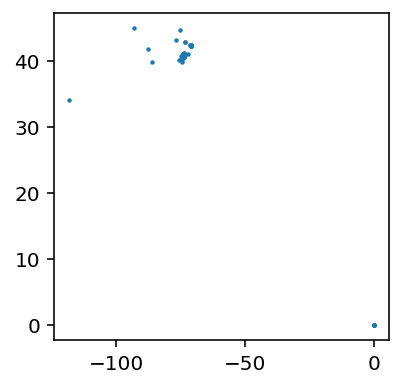

In [19]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(3,3))
ax.scatter(df_rent['longitude'], df_rent['latitude'], s=1.5)
plt.show()

In [7]:
df_rent[['longitude','latitude']].describe()

,longitude,latitude
count,49352.000000,49352.000000
mean,-73.955716,40.741545
std,1.177912,0.638535
min,-118.271000,0.000000
25%,-73.991700,40.728300
50%,-73.977900,40.751800
75%,-73.954800,40.774300
max,0.000000,44.883500


* Note: the minimum latitude is 0 and the maximum longitude is 0, these points force the scale of the plot to be not very usable
* Additionally, these points are outside of the context of New York appartments


In [14]:
sum(df_rent['latitude']==0), sum(df_rent['longitude']==0), len(df_rent)

(12, 12, 49352)

In [15]:
df_rent[df_rent['latitude']==0]['street_address']

2028             145 28 Street
37426       Van Sicklen street
39134               219 E 28th
46941         1632 Madison Ave
49884           41-42 24th St 
63688     450 East 83rd Street
66197              247 west 87
69423              118 W 109th
70841             246 Mott St 
76934               21 W 106th
85521                338 e. 53
106350      259 Decatur Street
Name: street_address, dtype: object

In [17]:
df_rent.loc[df_rent['latitude']==0, 'street_address']

2028             145 28 Street
37426       Van Sicklen street
39134               219 E 28th
46941         1632 Madison Ave
49884           41-42 24th St 
63688     450 East 83rd Street
66197              247 west 87
69423              118 W 109th
70841             246 Mott St 
76934               21 W 106th
85521                338 e. 53
106350      259 Decatur Street
Name: street_address, dtype: object

In [8]:
# filtering out entries based on coordinate data being outside the estimate bounds of NYC
df[df['latitude']>40.55].head(2).T

,4,6
bathrooms,1,1
bedrooms,1,2
building_id,8579a0b0d54db803821a35a4a615e97a,b8e75fc949a6cd8225b455648a951712
created,2016-06-16 05:55:27,2016-06-01 05:44:33
description,Spacious 1 Bedroom 1 Bathroom in Williamsburg!...,BRAND NEW GUT RENOVATED TRUE 2 BEDROOMFind you...
display_address,145 Borinquen Place,East 44th
features,"[Dining Room, Pre-War, Laundry in Building, Di...","[Doorman, Elevator, Laundry in Building, Dishw..."
latitude,40.7108,40.7513
listing_id,7170325,7092344
longitude,-73.9539,-73.9722


In [23]:
# combining bounds to further filter out data points outside of estimated bounds
df[(df['latitude']>40.55) & (df['latitude']<40.94)].head(2)

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level
4,1.0,1,8579a0b0d54db803821a35a4a615e97a,2016-06-16 05:55:27,Spacious 1 Bedroom 1 Bathroom in Williamsburg!...,145 Borinquen Place,"[Dining Room, Pre-War, Laundry in Building, Di...",40.7108,7170325,-73.9539,a10db4590843d78c784171a107bdacb4,[https://photos.renthop.com/2/7170325_3bb5ac84...,2400,145 Borinquen Place,medium
6,1.0,2,b8e75fc949a6cd8225b455648a951712,2016-06-01 05:44:33,BRAND NEW GUT RENOVATED TRUE 2 BEDROOMFind you...,East 44th,"[Doorman, Elevator, Laundry in Building, Dishw...",40.7513,7092344,-73.9722,955db33477af4f40004820b4aed804a0,[https://photos.renthop.com/2/7092344_7663c19a...,3800,230 East 44th,low


In [24]:
# applying as series of "and" statements to subset the part of the df we are interested in
df = df[(df['latitude']>40.55) &
        (df['latitude']<40.94) &
        (df['longitude']>-74.1) &
        (df['longitude']<-73.67)].copy()
print(len(df), len(df_rent))

48415 49352


## Heatmap from GPS Coordinates:

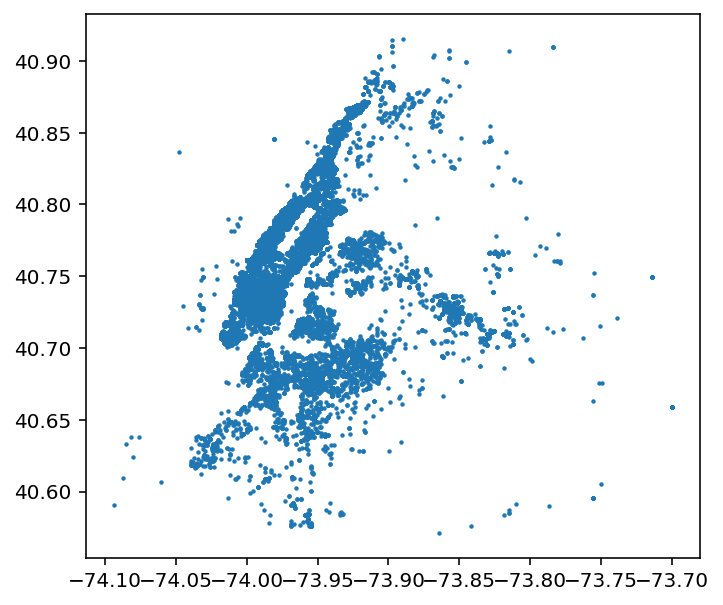

In [34]:
# more usable scatter plot without outlying points
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5.5,5))
ax.scatter(df['longitude'], df['latitude'], s=1.5)
plt.show()

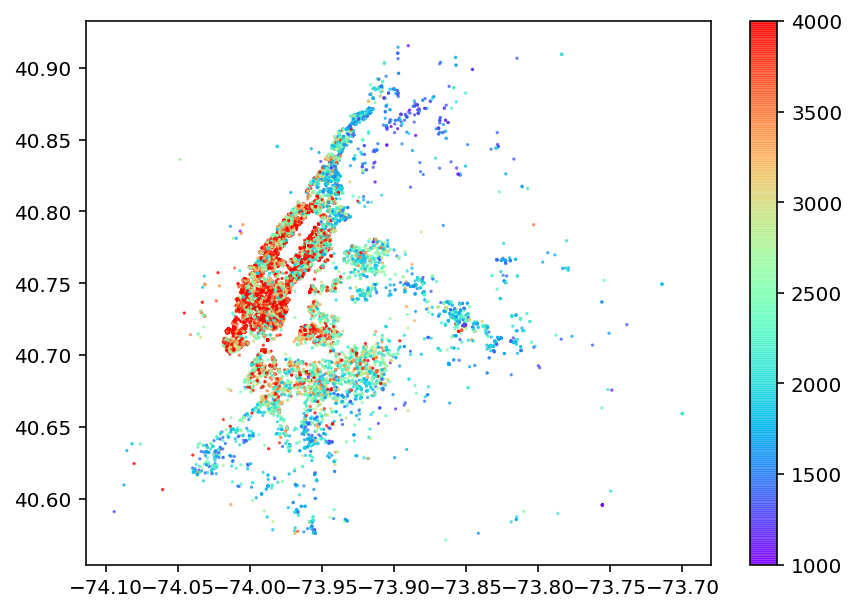

In [45]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7,5))
m = ax.scatter(df['longitude'],
               df['latitude'],
               alpha=0.8,
               s=1.5,
               vmin=1000, vmax=4000,
               c=df['price'],
               cmap='rainbow',
               marker='.')
plt.colorbar(m)
plt.show()

## Exercise 2:

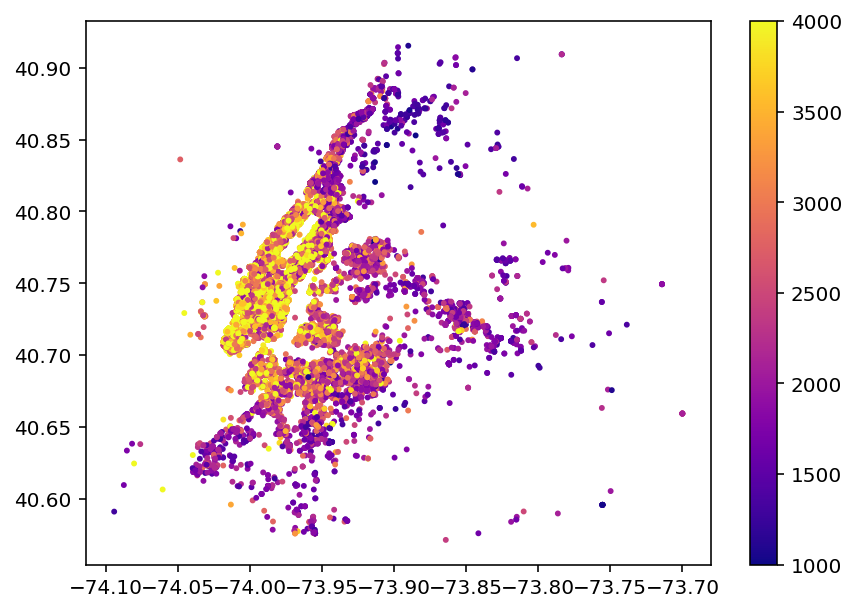

In [88]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7,5))
m = ax.scatter(df['longitude'],
               df['latitude'],
               alpha=1,
               s=15,
               vmin=1000, vmax=4000,
               c=df['price'],
               cmap='plasma',
               marker='.')
plt.colorbar(m)
plt.show()

## Advertisement Day of the Week:

In [98]:
df['created'] = pd.to_datetime(df['created'])

In [99]:
# create new column that is the day of the week
df['day'] = df['created'].dt.dayofweek
df['day']

4         3
6         2
9         1
10        4
15        1
         ..
124000    1
124002    5
124004    1
124008    1
124009    2
Name: day, Length: 48415, dtype: int64

[('Mon', 4172.0), ('Tue', 8220.0), ('Wed', 9224.0), ('Thu', 8043.0), ('Fri', 7451.0), ('Sat', 6833.0), ('Sun', 4472.0)]
bins [0 1 2 3 4 5 6 7]


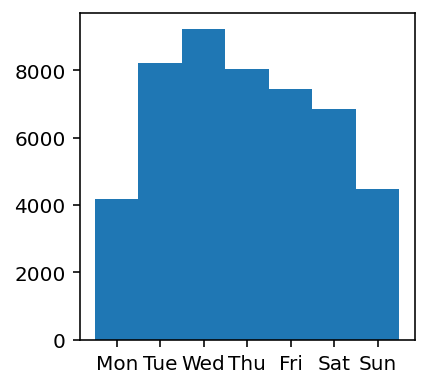

In [100]:
days = ['Mon','Tue','Wed',"Thu",'Fri','Sat','Sun']
fig, ax = plt.subplots(figsize=(3,3))
n, bins, _ = ax.hist(df['day'], bins=range(7+1), align='left')
print(list(zip(days,n)))
print("bins", bins)
ax.set_xticks(range(7))
ax.set_xticklabels(['Mon','Tue','Wed',"Thu",'Fri','Sat','Sun'])
plt.show()

In [101]:
daycounts = df.groupby('day').count()['price'] # picking price column arbitrarily
daycounts

day
0    4172
1    8220
2    9224
3    8043
4    7451
5    6833
6    4472
Name: price, dtype: int64

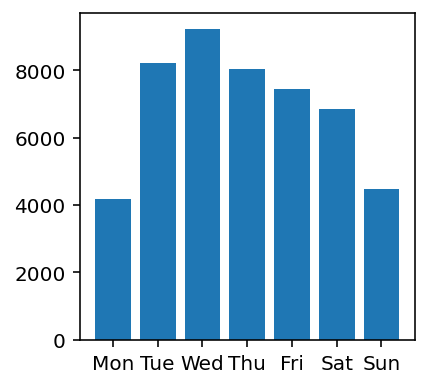

In [102]:
days = ['Mon','Tue','Wed',"Thu",'Fri','Sat','Sun']
fig, ax = plt.subplots(figsize=(3,3))
ax.bar(range(7), daycounts)
ax.set_xticks(range(7))
ax.set_xticklabels(['Mon','Tue','Wed',"Thu",'Fri','Sat','Sun'])
plt.show()

In [103]:
pd.cut(df['day'], bins=range(7), include_lowest=True, right=False).value_counts()

[2, 3)    9224
[1, 2)    8220
[3, 4)    8043
[4, 5)    7451
[5, 6)    6833
[0, 1)    4172
Name: day, dtype: int64

In [105]:
df_counts = df.groupby(['day','interest_level']).count()
df_counts['price']

day  interest_level
0    high               337
     low               2866
     medium             969
1    high               628
     low               5642
     medium            1950
2    high               722
     low               6425
     medium            2077
3    high               636
     low               5521
     medium            1886
4    high               649
     low               4897
     medium            1905
5    high               510
     low               4844
     medium            1479
6    high               351
     low               3179
     medium             942
Name: price, dtype: int64

In [106]:
counts = df_counts['price'].to_numpy()
counts

array([ 337, 2866,  969,  628, 5642, 1950,  722, 6425, 2077,  636, 5521,
       1886,  649, 4897, 1905,  510, 4844, 1479,  351, 3179,  942])

In [109]:
low = df_counts.loc[(range(7), 'low'), 'price'].values
med = df_counts.loc[(range(7), 'medium'), 'price'].values
high = df_counts.loc[(range(7), 'high'), 'price'].values
low, med, high

(array([2866, 5642, 6425, 5521, 4897, 4844, 3179]),
 array([ 969, 1950, 2077, 1886, 1905, 1479,  942]),
 array([337, 628, 722, 636, 649, 510, 351]))

<ipython-input-112-ce4dcbf83eac>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([None,'Mon','Tue','Wed','Thu','Fri','Sat','Sun'])


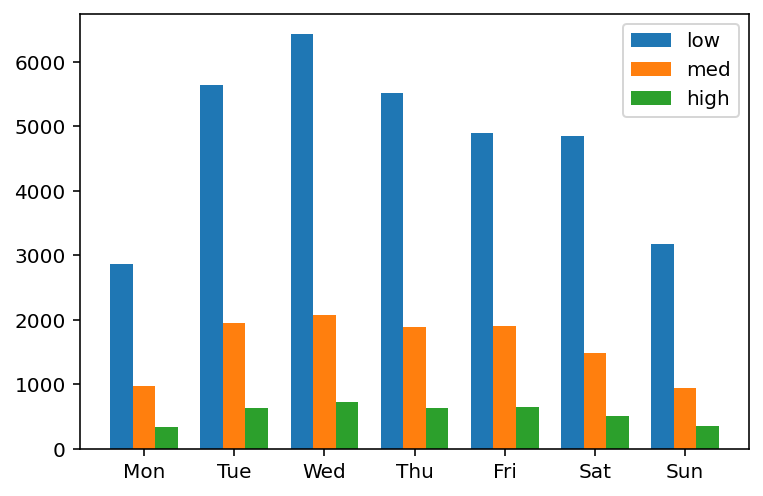

In [112]:
fig, ax = plt.subplots()
w = .25

# horizontally ofset bars in sets of three by applying +/- w
ax.bar(np.arange(7)-w, low,  width=w, label="low")
ax.bar(np.arange(7),   med,  width=w, label="med")
ax.bar(np.arange(7)+w, high, width=w, label="high")
ax.set_xticklabels([None,'Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
plt.legend()
plt.show()

## Exercise 3:

In [114]:
avg_mgr_prices = df.groupby('manager_id').mean()['price']
avg_mgr_prices

manager_id
0000abd7518b94c35a90d64b56fbf3e6     2706.416667
001ce808ce1720e24a9510e014c69707     3321.500000
003fc4e9a70053082f131b1054966aaf    10000.000000
00607a02f6efd9c6c7c588826e471ee9     2975.000000
00995ff28d79127ed2dca8320e9e7d09     2544.666667
                                        ...     
ff810b43aecfacd00f20a2912ff1e288     3400.000000
ff8f1175d95c5a866ef73399cd54a1a1     4231.428571
ffb9eceeaa4d60da7b41cc8f0954cd50     2422.500000
ffd3c60281949a5cd806030203a79558     3050.200000
ffd7307e4924587b30ec014a95db1362     3591.886957
Name: price, Length: 3415, dtype: float64

* average prices of rental properties vary significantly between managers, 2K - 10K

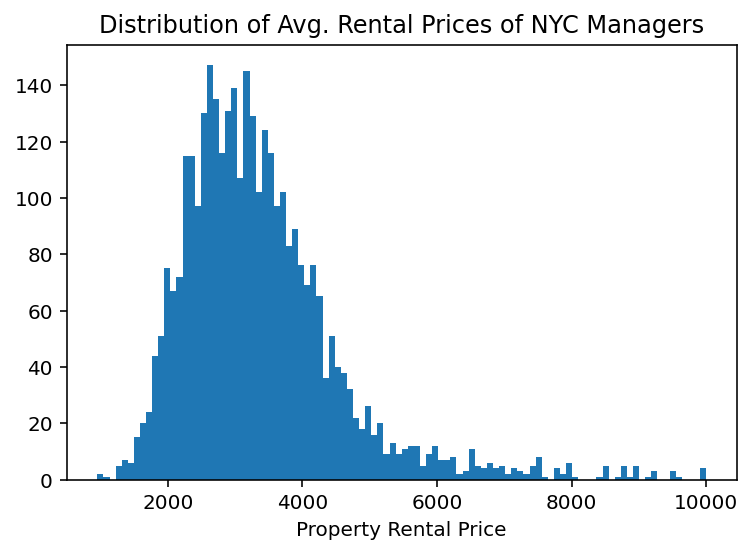

In [119]:
fig, ax = plt.subplots()
ax.hist(avg_mgr_prices, bins=100)
ax.set_xlabel("Property Rental Price")
plt.title('Distribution of Avg. Rental Prices of NYC Managers')
plt.show()

In [120]:
df['features'] = df['features'].astype(str)
df['features'] = df['features'].str.lower()
df['features']

4         ['dining room', 'pre-war', 'laundry in buildin...
6         ['doorman', 'elevator', 'laundry in building',...
9         ['doorman', 'elevator', 'laundry in building',...
10                                                       []
15        ['doorman', 'elevator', 'fitness center', 'lau...
                                ...                        
124000        ['elevator', 'dishwasher', 'hardwood floors']
124002    ['common outdoor space', 'cats allowed', 'dogs...
124004    ['dining room', 'elevator', 'pre-war', 'laundr...
124008    ['pre-war', 'laundry in unit', 'dishwasher', '...
124009    ['dining room', 'elevator', 'laundry in buildi...
Name: features, Length: 48415, dtype: object

* the features column value for each row is a list object, varies in length for rows
* process these lists to a string of data that can be queried by pandas string functions

In [122]:
df['doorman'] = df['features'].str.contains('doorman')
df['laundry'] = df['features'].str.contains('laundry')
df['parking'] = df['features'].str.contains('parking')
df['hardwood'] = df['features'].str.contains('hardwood')

In [123]:
df.groupby('doorman').mean()['price']

doorman
False    3099.578824
True     3936.753628
Name: price, dtype: float64

In [124]:
df.loc[~df['doorman'], 'price'].mean(), df.loc[df['doorman'], 'price'].mean()

(3099.5788236969524, 3936.753628179269)

In [125]:
df.groupby('laundry').mean()['price']

laundry
False    3155.628269
True     3770.652492
Name: price, dtype: float64

In [126]:
df.groupby('parking').mean()['price']

parking
False    3447.547897
True     3707.196646
Name: price, dtype: float64

In [127]:
df.groupby('hardwood').mean()['price']

hardwood
False    3343.042858
True     3560.034852
Name: price, dtype: float64

* 

## Adding Additional Geographic Data

In [132]:
hoods = {
    "hells" : [40.7622, -73.9924],
    "astoria" : [40.7796684, -73.9215888],
    "Evillage" : [40.723163774, -73.984829394],
    "LowerEast" : [40.715033, -73.9842724],
    "UpperEast" : [40.768163594, -73.959329496],
    "financial" : [40.703830518, -74.005666644],
}

* now have intervals of coordinates that assign a value to a hood of NYC if a value is in the interval

In [130]:
# Distance from each apartment to Hells kitchen ("hells")
np.abs(df.latitude - 40.7622) + np.abs(df.longitude - -73.9924)

4         0.0899
6         0.0311
9         0.0346
10        0.0976
15        0.0364
           ...  
124000    0.1339
124002    0.0922
124004    0.2227
124008    0.0267
124009    0.0240
Length: 48415, dtype: float64

In [135]:
for hood,loc in hoods.items():
    # compute manhattan distance from apartment to each neighborhood
    df[hood] = np.abs(df.latitude - loc[0]) + np.abs(df.longitude - loc[1])

In [136]:
for hood,loc in hoods.items():
    corr = np.corrcoef(df[hood], df['price'])
    corr = corr[0,1]
    print(f"Hood {hood} correlation with price: {corr:.3f}")

Hood hells correlation with price: -0.321
Hood astoria correlation with price: 0.054
Hood Evillage correlation with price: -0.340
Hood LowerEast correlation with price: -0.326
Hood UpperEast correlation with price: -0.136
Hood financial correlation with price: -0.300


In [137]:
corrs = []
for hood,loc in hoods.items():
    corr = np.corrcoef(df[hood], df['price'])[0,1]
    corrs.append(corr)
df_corr = pd.DataFrame(data=corrs, columns=['correlation'], index=hoods.keys())
df_corr = df_corr.sort_values('correlation')
df_corr

,correlation
Evillage,-0.340208
LowerEast,-0.326255
hells,-0.321355
financial,-0.300369
UpperEast,-0.135940
astoria,0.053675


In [138]:
df_corr.loc['hells'][0]

-0.3213548979788603

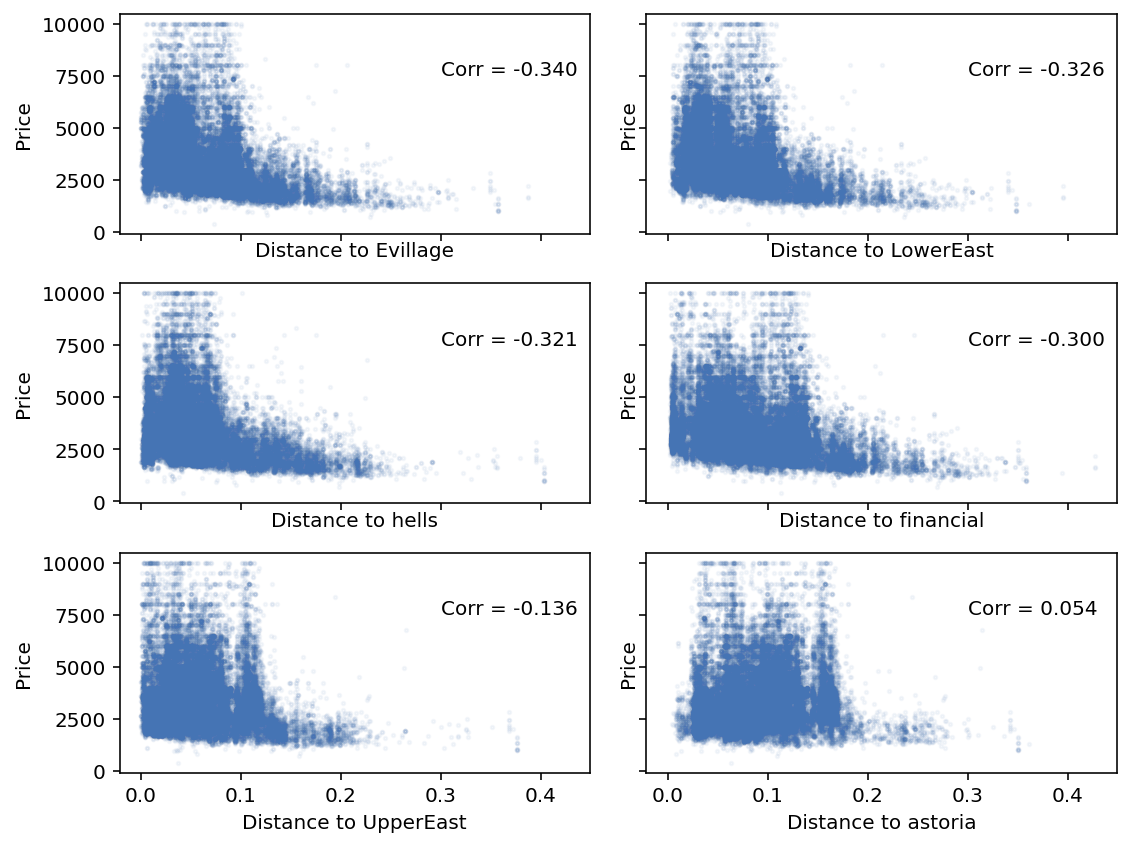

In [139]:
fig, axes = plt.subplots(nrows=3,ncols=2, figsize=(8,6), sharey=True, sharex=True)
axes = axes.flatten()
for i,hood in enumerate(df_corr.index):
    axes[i].scatter(df[hood], df['price'], s=3, alpha=.05, c='#4574B4')
    axes[i].set_xlabel(f"Distance to {hood}")
    axes[i].set_ylabel("Price")
    axes[i].text(.3,7500, f"Corr = {df_corr.loc[hood][0]:.3f}")
plt.tight_layout()
plt.show()

## Exercise 4:

* `df.copy()` is useful in adding another instance of a dataframe in memory, to avoid needing to re-read in data or alter a dataset unintentionally

* several conditions such as `(df['column']<x)` can be passed as an argument when subsetting a dataframe `df[df[ ... ]]` and join them with the `&` operator to more finely limit the range of data being looked at

* `datetimeObject.dt.dayofweek` is an example of using datetime methods of datetime objects to yield specific formats of the information in the object, such as day, hour, week, year, etc...

* `df['column'].str.contains('string')` will return a serires of booleans indicating whether the entry in that column at that index contains the string argument





## Bulldozer Dataset

In [35]:
df_bull = pd.read_csv(path+'Train.csv', parse_dates=['saledate'])

/home/jacek/usf/msds593/labs/ds/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (13,39,40,41) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [36]:
df_bull.head(5)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Exercise 1

In [38]:
for col in df_bull.columns[[13,39,40,41]]:
    print(df_bull[col].unique()[0:10])

[nan 'II' '-6E' 'LC' '-5' 'III' '-1' '5' '-2' '1']
[nan 'None or Unspecified' 'Yes']
[nan 'None or Unspecified' 'Yes']
[nan 'Standard' 'High Flow' 'None or Unspecified']


In [39]:
dtypes = {col:str for col in ['fiModelSeries', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow']}
dtypes

{'fiModelSeries': str,
 'Coupler_System': str,
 'Grouser_Tracks': str,
 'Hydraulics_Flow': str}

In [42]:
df_bull = df_bull.sort_values('saledate') # let's order them by sale date
df_bull.head(2)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
205615,1646770,9500,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
92803,1404019,24000,1169900,7110,132,99.0,1986,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
df_bull = df_bull.set_index('SalesID')
df_bull.head(2) 

,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
SalesID,,,,,,,,,,,,,,,,,,,,,
1646770,9500,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,TD20,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
1404019,24000,1169900,7110,132,99.0,1986,NaN,NaN,1989-01-31,416,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
df_bull.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401125 entries, 1646770 to 6312170
Data columns (total 52 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalePrice                 401125 non-null  int64         
 1   MachineID                 401125 non-null  int64         
 2   ModelID                   401125 non-null  int64         
 3   datasource                401125 non-null  int64         
 4   auctioneerID              380989 non-null  float64       
 5   YearMade                  401125 non-null  int64         
 6   MachineHoursCurrentMeter  142765 non-null  float64       
 7   UsageBand                 69639 non-null   object        
 8   saledate                  401125 non-null  datetime64[ns]
 9   fiModelDesc               401125 non-null  object        
 10  fiBaseModel               401125 non-null  object        
 11  fiSecondaryDesc           263934 non-null  object        
